In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Building the model
## Importing the dataset
We use the credit default dataset from the "machine learning challenge one" competition from www.hackerearth.com. This dataset contains anonymized loan data of clients that applied for a loan at a bank. About 20% of the loans in the dataset resulted in a default. 

The dataset contains the following features
- **loan_status**: Current status of the loan (0: default, 1: non-default)
- **annual_inc**: The self-reported annual income provided by the borrower during registration.
- **home_ownership**: The home ownership status provided by the borrower during registration. Our values are: OTHER/NONE, MORTGAGE, OWN, RENT
- **term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
- **loan_amnt**: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **member_id**: A unique LC assigned ID for the loan listing.

In [2]:
df = pd.read_csv("credit_default.csv")
df.describe()

,member_id,funded_amnt,int_rate,annual_inc,total_rec_int,tot_cur_bal,loan_status
count,5.324280e+05,532428.000000,532428.000000,5.324250e+05,532428.000000,4.904240e+05,532428.000000
mean,3.500547e+07,14744.271291,13.242969,7.502984e+04,1753.428788,1.395541e+05,0.236327
std,2.412148e+07,8429.139277,4.379611,6.519985e+04,2093.199837,1.539149e+05,0.424826
min,7.047300e+04,500.000000,5.320000,1.200000e+03,0.000000,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,9.990000,4.500000e+04,441.600000,2.983975e+04,0.000000
50%,3.709590e+07,13000.000000,12.990000,6.500000e+04,1072.690000,8.066950e+04,0.000000
75%,5.848920e+07,20000.000000,16.200000,9.000000e+04,2234.735000,2.084792e+05,0.000000
max,7.354484e+07,35000.000000,28.990000,9.500000e+06,24205.620000,8.000078e+06,1.000000


## Cleaning

In [3]:
# Term
Term_remove_month = [x[:-7] for x in df['term']]
df['term'] = Term_remove_month


In [4]:
# House ownership
cleanup_homeownership = {'home_ownership' :{'OWN': 4, 'MORTGAGE': 3, 'RENT' :2, 'OTHER':1, 'NONE':0, 'ANY': 3}}
df.replace(cleanup_homeownership, inplace=True)
df.head()

,member_id,funded_amnt,term,int_rate,home_ownership,annual_inc,total_rec_int,tot_cur_bal,loan_status
0,58189336,14350,36,19.19,4,28700.0,1173.84,28699.0,0
1,70011223,4800,36,10.99,3,65000.0,83.95,9974.0,0
2,70255675,10000,36,7.26,4,45000.0,56.47,38295.0,0
3,1893936,15000,36,19.72,2,105000.0,4858.62,55564.0,0
4,7652106,16000,36,10.64,2,52000.0,2296.41,47159.0,0


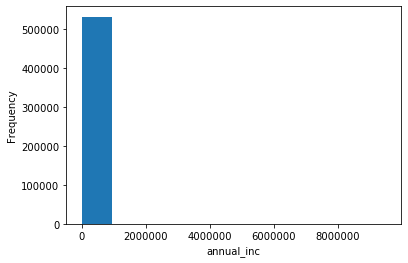

In [5]:
#Plotting Annual_income
plt.figure()
ax1=df['annual_inc'].plot.hist()
ax1.set_xlabel('annual_inc')
plt.show()

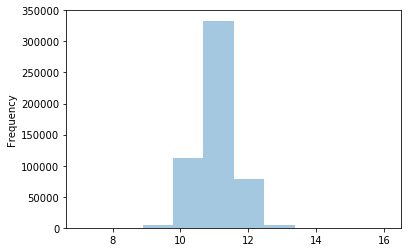

In [6]:
# Transforming, taking log of annual income 
plt.figure()
df['log_annual_inc'] = df['annual_inc'].apply(lambda x: np.log(x))
df['log_annual_inc'].plot.hist(alpha=0.4)
plt.show()

Text(0.5, 0, 'Loan_amount')

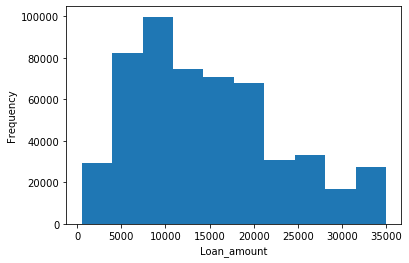

In [7]:
#Plotting funded_amnt
ax2=df['funded_amnt'].plot.hist()
ax2.set_xlabel('Loan_amount')

In [8]:
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

45000.0


In [9]:
# remove outliers for annual_income
df_outliers = df[(df['annual_inc'] < (Q1 - 1.5 * IQR)) | (df['annual_inc'] > (Q3 + 1.5 * IQR)) ] 
df_clean = df[(df['annual_inc'] > (Q1 - 1.5 * IQR)) & (df['annual_inc'] < (Q3 + 1.5 * IQR)) ]

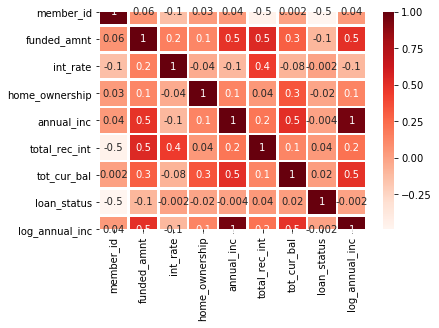

In [10]:
import seaborn as sns
plt.figure()
sns.heatmap(data = df_clean.corr(),annot=True, linewidths=1.5, fmt='.1g',cmap=plt.cm.Reds)
plt.show()

In [11]:
df_clean

,member_id,funded_amnt,term,int_rate,home_ownership,annual_inc,total_rec_int,tot_cur_bal,loan_status,log_annual_inc
0,58189336,14350,36,19.19,4,28700.0,1173.84,28699.0,0,10.264652
1,70011223,4800,36,10.99,3,65000.0,83.95,9974.0,0,11.082143
2,70255675,10000,36,7.26,4,45000.0,56.47,38295.0,0,10.714418
3,1893936,15000,36,19.72,2,105000.0,4858.62,55564.0,0,11.561716
4,7652106,16000,36,10.64,2,52000.0,2296.41,47159.0,0,10.858999
...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,36,12.49,3,75000.0,2595.45,83087.0,0,11.225243
532424,29403184,12000,60,14.99,3,59000.0,2182.92,227812.0,0,10.985293
532425,7357607,18725,60,20.80,2,42504.0,645.32,26010.0,1,10.657353
532426,23182668,21000,60,16.29,2,50000.0,4619.79,29197.0,0,10.819778


## Model Training
For the article we use a model that is trained on only three features: `member_id`, `annual_inc`, `funded_amnt` using a random forest classifier. By training on only a smaller subset of all features we have to give up on the models accuracy, but it reduces its complexity. 

The dataset is first standardized to make it compatible with the step-by-step guide in the article


In [12]:
features = ['member_id', 'annual_inc', 'funded_amnt']
X = StandardScaler().fit_transform(df_clean[features])
y = df_clean['loan_status'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33)
X_train.shape[0] == y_train.shape[0]


True

In [14]:
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier()
Model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The default value of n_estimators will change from "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
import sklearn.metrics as metrics
y_predicted = Model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predicted).ravel()
recal = tp/(tp+fn)
precision = tp/(tp+fp)

print("accuracy = {acc:0.3f},\nrecall = {recal:0.3f},\nprecision = {precision:0.3f}".format(
        acc=accuracy, recal=recal,precision=precision))


accuracy = 0.796,
recall = 0.434,
precision = 0.598


## convenience functions

In [38]:
from sklearn.linear_model import LinearRegression

def make_perturbations(instance, sigma=0.05, num=700, seed=None ):
    np.random.seed(seed=seed)
    X_perturb = np.random.normal(instance,sigma,size=(num,instance.shape[0]))
    return X_perturb

def get_weights(instance, X_perturb, kernel_width):
    distances = np.sum((instance - X_perturb)**2, axis=1)
    weights = np.sqrt(np.exp(-(distances**2)/(kernel_width**2))) #Kernel function
    return weights

def get_local_coeffs(X_perturb, y_perturb, weights):
    local_model = LinearRegression() 
    local_model.fit(X_perturb, y_perturb, sample_weight=weights)
    y_linmodel = local_model.predict(X_perturb)
    a = local_model.coef_
    c = local_model.intercept_
    return a, c


The kernel gives a larger weight to perturbations closer by the instance than those further away. The `kernel_width` sets a scale for locality: decreasing this value will give more importance to perturbations that lie closer by the instance. 

$$ \textrm{weight} = \sqrt{\exp(-\textrm{distance}^2/\textrm{kernel width}^2)}$$

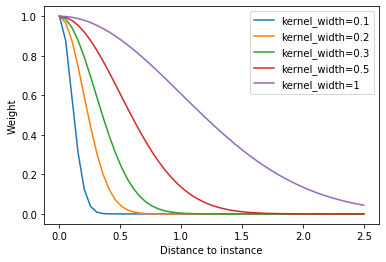

In [22]:
x = np.linspace(0,2.5)
plt.figure()
for width in [0.1,0.2,0.3,0.5,1]:
    plt.plot(x, np.sqrt(np.exp(-(x**2)/width**2)), label="kernel_width="+str(width))
plt.xlabel("Distance to instance")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [23]:
x1min, x1max = X[:,0].min(), X[:,0].max()
x2min, x2max = X[:,1].min(), X[:,1].max()
x3min, x3max = X[:,2].min(), X[:,2].max()

xmin = [x1min, x2min, x3min]
xmax = [x1max, x2max, x3max]


## step 1: choosing an instance

In [39]:
Xi = np.array([ -0.71247975, -0.04996247, -1.02083371]) #-0.71247975, -0.04996247, -1.02083371

## step 2: make perturbations around the instance

In [66]:
features

['member_id', 'annual_inc', 'funded_amnt']

In [64]:
sigma = 0.9 # Select standard deviation
num_perturb = 750 # number of perturbations generated
kernel_width = 0.9 #0.09

X_perturb = make_perturbations(Xi, sigma=sigma, num=num_perturb, seed=8 )

<IPython.core.display.Javascript object>


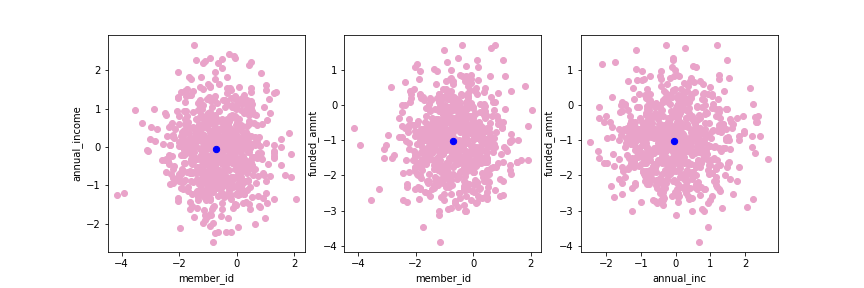

In [73]:
fig, axs = plt.subplots(1,3, figsize = (12,4))
axs[0].scatter((X_perturb)[:,0],(X_perturb)[:,1], c="#e9a3c9")
axs[0].scatter(Xi[0],Xi[1],c="blue",marker="o",s=40 )
axs[0].set_xlabel('member_id')
axs[0].set_ylabel('annual_income')

axs[1].scatter((X_perturb)[:,0],(X_perturb)[:,2], c="#e9a3c9")
axs[1].scatter(Xi[0],Xi[2],c="blue",marker="o",s=40 )
axs[1].set_xlabel('member_id')
axs[1].set_ylabel('funded_amnt')

axs[2].scatter((X_perturb)[:,1],(X_perturb)[:,2], c="#e9a3c9")
axs[2].scatter(Xi[1],Xi[2],c="blue",marker="o",s=40 )
axs[2].set_xlabel('annual_inc')
axs[2].set_ylabel('funded_amnt')

plt.show()

## step 3: making the predictions

In [74]:
y_perturb = Model.predict(X_perturb)

<IPython.core.display.Javascript object>


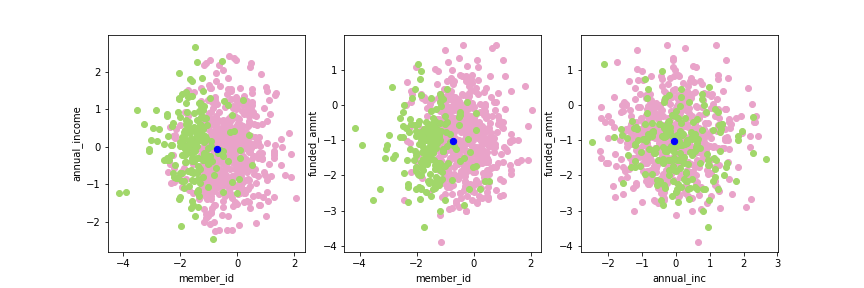

In [77]:
x1, x2 = X_perturb[y_perturb == 0], X_perturb[y_perturb == 1]

fig, axs = plt.subplots(1,3, figsize = (12,4))

axs[0].scatter((x1)[:,0],(x1)[:,1], c="#e9a3c9")
axs[0].scatter((x2)[:,0],(x2)[:,1], c="#a1d76a")
axs[0].scatter(Xi[0],Xi[1],c="blue",marker="o",s=40 )
axs[0].set_xlabel('member_id')
axs[0].set_ylabel('annual_income')

axs[1].scatter((x1)[:,0],(x1)[:,2], c="#e9a3c9")
axs[1].scatter((x2)[:,0],(x2)[:,2], c="#a1d76a")
axs[1].scatter(Xi[0],Xi[2],c="blue",marker="o",s=40 )
axs[1].set_xlabel('member_id')
axs[1].set_ylabel('funded_amnt')

axs[2].scatter((x1)[:,1],(x1)[:,2], c="#e9a3c9")
axs[2].scatter((x2)[:,1],(x2)[:,2], c="#a1d76a")
axs[2].scatter(Xi[1],Xi[2],c="blue",marker="o",s=40 )
axs[2].set_xlabel('annual_inc')
axs[2].set_ylabel('funded_amnt')

plt.show()

## step 4: weighting the perturbations

In [78]:
weights = get_weights(Xi, X_perturb, kernel_width)

<IPython.core.display.Javascript object>


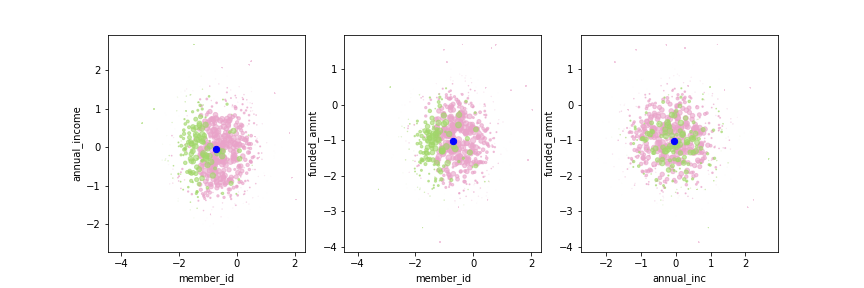

In [86]:
x1, x2 = X_perturb[y_perturb == 0], X_perturb[y_perturb == 1]
s1, s2 = weights[y_perturb == 0], weights[y_perturb == 1]

fig, axs = plt.subplots(1,3, figsize = (12,4))

axs[0].scatter((x1)[:,0],(x1)[:,1], c="#e9a3c9",alpha=0.6,s=35*s1)
axs[0].scatter((x2)[:,0],(x2)[:,1], c="#a1d76a",alpha=0.6,s=35*s2)
axs[0].scatter(Xi[0],Xi[1],c="blue",marker="o",s=40 )
axs[0].set_xlabel('member_id')
axs[0].set_ylabel('annual_income')

axs[1].scatter((x1)[:,0],(x1)[:,2], c="#e9a3c9",alpha=0.6,s=35*s1)
axs[1].scatter((x2)[:,0],(x2)[:,2], c="#a1d76a",alpha=0.6,s=35*s2)
axs[1].scatter(Xi[0],Xi[2],c="blue",marker="o",s=40 )
axs[1].set_xlabel('member_id')
axs[1].set_ylabel('funded_amnt')

axs[2].scatter((x1)[:,1],(x1)[:,2], c="#e9a3c9",alpha=0.6,s=35*s1)
axs[2].scatter((x2)[:,1],(x2)[:,2], c="#a1d76a",alpha=0.6,s=35*s2)
axs[2].scatter(Xi[1],Xi[2],c="blue",marker="o",s=40 )
axs[2].set_xlabel('annual_inc')
axs[2].set_ylabel('funded_amnt')

plt.show()

<IPython.core.display.Javascript object>


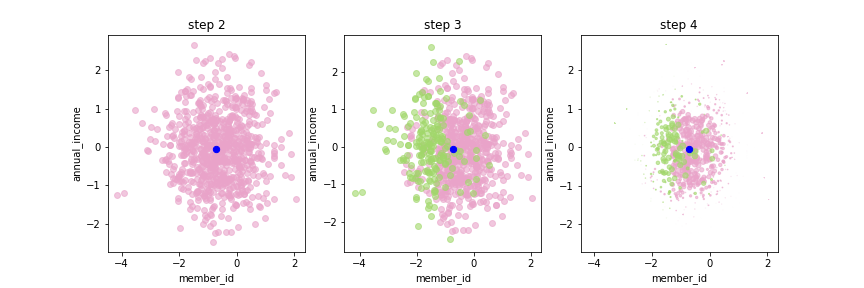

In [94]:
x1, x2 = X_perturb[y_perturb == 0], X_perturb[y_perturb == 1]
s1, s2 = weights[y_perturb == 0], weights[y_perturb == 1]

fig, axs = plt.subplots(1,3, figsize = (12,4))

axs[0].scatter((X_perturb)[:,0],(X_perturb)[:,1], c="#e9a3c9",alpha=0.6,s=35)
axs[0].scatter(Xi[0],Xi[1],c="blue",marker="o",s=40 )
axs[0].set_xlabel('member_id')
axs[0].set_ylabel('annual_income')
axs[0].set_title("step 2")

axs[1].scatter((x1)[:,0],(x1)[:,1], c="#e9a3c9",alpha=0.6)
axs[1].scatter((x2)[:,0],(x2)[:,1], c="#a1d76a",alpha=0.6)
axs[1].scatter(Xi[0],Xi[1],c="blue",marker="o",s=40 )
axs[1].set_xlabel('member_id')
axs[1].set_ylabel('annual_income')
axs[1].set_title("step 3")


axs[2].scatter((x1)[:,0],(x1)[:,1], c="#e9a3c9",alpha=0.6,s=35*s1)
axs[2].scatter((x2)[:,0],(x2)[:,1], c="#a1d76a",alpha=0.6,s=35*s2)
axs[2].scatter(Xi[0],Xi[1],c="blue",marker="o",s=40 )
axs[2].set_xlabel('member_id')
axs[2].set_ylabel('annual_income')
axs[2].set_title("step 4")

plt.show()

## step 5: training the local model

In [80]:
a,c = get_local_coeffs(X_perturb, y_perturb, weights)
for i in range(3):
    print("{feature}: {score}".format(feature=features[i], score=a[i]))

member_id: -0.455958864681687
annual_inc: 0.043629119168288266
funded_amnt: -0.04808555741000439


The local model is sensitive to both random sampling and kernel width as illustrated below

In [96]:
widths = np.linspace(0.01, sigma*np.sqrt(3), 100)
num =10000

def get_mean_and_CL(a):
    mean = np.mean(a)
    down = np.sort(a)[5]
    up = np.sort(a)[95]
    return mean, down, up

ameans, aups, adowns = [], [], []
bmeans, bups, bdowns = [], [], []
cmeans, cups, cdowns = [], [], []

for width in widths:
    alist, blist, clist = [], [], []
    for seed in range(100):
        X_perturb = make_perturbations(Xi, sigma=sigma, num=num, seed=seed )
        y_perturb = Model.predict(X_perturb)
        weights = get_weights(Xi, X_perturb, width)
        a,c = get_local_coeffs(X_perturb, y_perturb, weights)
        alist.append(a[0])
        blist.append(a[1])
        clist.append(a[2])
    amean, aup, adown = get_mean_and_CL(alist)
    bmean, bup, bdown = get_mean_and_CL(blist)
    cmean, cup, cdown = get_mean_and_CL(clist)
    ameans.append(amean)
    bmeans.append(bmean)
    cmeans.append(cmean)
    
    aups.append(aup)
    bups.append(bup)
    cups.append(cup)
    
    adowns.append(adown)
    bdowns.append(bdown)
    cdowns.append(cdown)

<IPython.core.display.Javascript object>


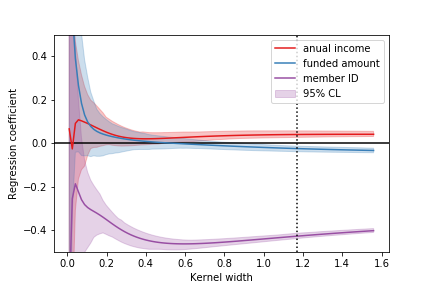

In [99]:
plt.figure()
plt.axhline(0, color='black')

plt.plot(widths, bmeans, label = "anual income", c="#e41a1c")
plt.plot(widths, cmeans, label = "funded amount", c="#377eb8")
plt.plot(widths, ameans, label = "member ID", c="#984ea3")

plt.fill_between(widths, bdowns, bups, color ="#e41a1c", alpha=0.25)
plt.fill_between(widths, cdowns, cups, color ="#377eb8",  alpha=0.25)
plt.fill_between(widths, adowns, aups, color = "#984ea3", alpha=0.25, label = "95% CL")


plt.axvline(0.75*sigma*np.sqrt(3), color='black', ls=":")
plt.legend(loc=1)
plt.ylim([-0.5,0.5])

plt.xlabel("Kernel width")
plt.ylabel("Regression coefficient")

plt.show()

## visualizing the decision boundary

<IPython.core.display.Javascript object>


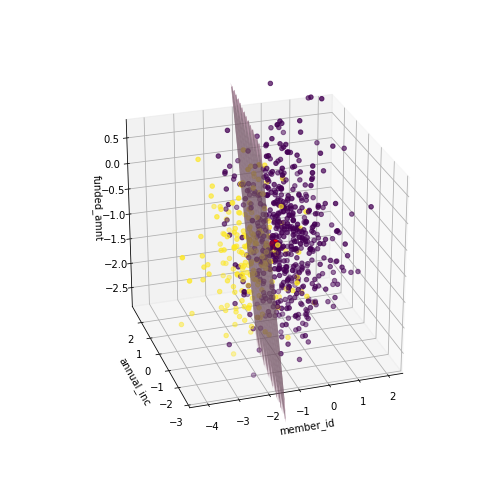

<ipython-input-101-1bc7bf6ed9f9>:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(xx, yy, zz)


In [101]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_perturb = make_perturbations(Xi, sigma=sigma, num=750, seed=8 )
y_perturb = Model.predict(X_perturb)
weights = get_weights(Xi, X_perturb, width)

plt.rcParams["axes.prop_cycle"] = plt.cycler('color', ["#e9a3c9", "#a1d76a"])

xx, yy = np.meshgrid(np.linspace(Xi[0]-3*sigma, Xi[0]+2*sigma,250), np.linspace(Xi[1]-3*sigma, Xi[1]+2*sigma,250))

def get_zz(xx,yy):
    (a,b,c), d = get_local_coeffs(X_perturb, y_perturb, weights)
    return (0.5-d-a*xx-b*yy)/c
zmin = Xi[2]-3*sigma
zmax = Xi[2]+3*sigma
zz = get_zz(xx,yy)

zz =  np.where( (zz > zmax) | (zz < zmin), np.nan, zz)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_perturb[:,0], X_perturb[:,1],X_perturb[:,2], c = y_perturb)
ax.scatter(Xi[0], Xi[1],Xi[2], c = "red", s = 100)
ax.plot_surface(xx, yy, zz)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

ax.set_zlim(Xi[2]-2*sigma, Xi[2]+2*sigma)
ax.view_init(elev=25, azim=-105)

plt.show()

<IPython.core.display.Javascript object>


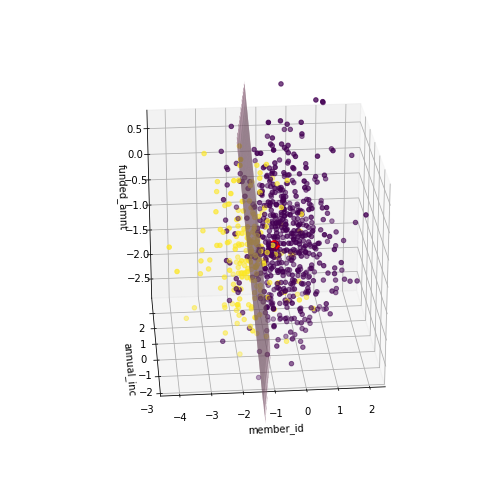

<ipython-input-119-3bca49bf5ea2>:6: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(xx, yy, zz)


In [119]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_perturb[:,0], X_perturb[:,1],X_perturb[:,2], c = y_perturb)
ax.scatter(Xi[0], Xi[1],Xi[2], c = "red", s = 100)
ax.plot_surface(xx, yy, zz)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

ax.set_zlim(Xi[2]-2*sigma, Xi[2]+2*sigma)
ax.view_init(elev=25, azim=-105)

for ii in range(0, 15):
    ax.view_init(elev=25, azim=-95-ii)
    plt.savefig("movie%d.png" % ii)

for ii in range(15, 30):
    ax.view_init(elev=25, azim=-124+ii)
    plt.savefig("movie%d.png" % ii)



We can easily construct two axes, one that lies in the decision boundary plane and one that is perpendicular to that plane. The equation for the decision boundary reads
$$ 0.5 = a*\text{member_id} + b*\text{annual_inc} + c*\text{funded_amnt} + d $$

from which we choose the two new axes:
$$ \tilde{x}_1 = a*\text{member_id} + b*\text{annual_inc}$$
$$ \tilde{x}_2 = c*\text{funded_amnt} + d$$

so that the new equation for the decision boundary is given by
$$ \tilde{x}_1 = 0.5 - \tilde{x}_2 $$

<IPython.core.display.Javascript object>


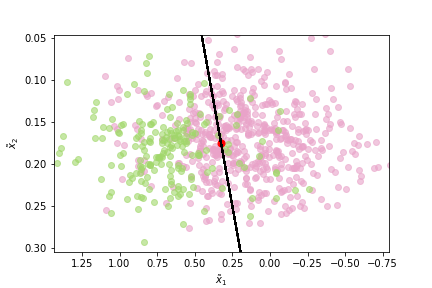

In [114]:
X_perturb = make_perturbations(Xi, sigma=sigma, num=num_perturb, seed=8 )
y_perturb = Model.predict(X_perturb)
weights = get_weights(Xi, X_perturb, kernel_width)
x1, x2 = X_perturb[y_perturb == 0], X_perturb[y_perturb == 1]
s1, s2 = weights[y_perturb == 0], weights[y_perturb == 1]

'''
new axis to plot on
'''
(a,b,c), d = get_local_coeffs(X_perturb, y_perturb, weights)

def u(x):
    return a*x[:,0] + b*x[:,1]

def v(x):
    return c*x[:,2]-d

u1 = u(x1)
v1 = v(x1)

u2 = u(x2)
v2 = v(x2)

umin = u(np.array([Xi])-3*sigma)
umax = u(np.array([Xi])+3*sigma)

vmin = v(np.array([Xi])-3*sigma)
vmax = v(np.array([Xi])+3*sigma)



zmax = Xi[2]+3*sigma
plt.figure()
plt.scatter(u1, v1, alpha = 0.6)
plt.scatter(u2, v2, alpha = 0.6)
plt.scatter(u(np.array([Xi])), v(np.array([Xi])), s=50, color="red")
plt.plot(u1, 1/2-u1, c= "black", ls="--")
plt.xlim(*umin, *umax)
plt.ylim(*vmin, *vmax)
plt.xlabel(r'$\tilde{x}_1$')
plt.ylabel(r'$\tilde{x}_2$')

plt.show()

